<a href="https://colab.research.google.com/github/DaffaStyn11/PCVK_2023/blob/main/BrainTumor_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the necessary libraries first

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

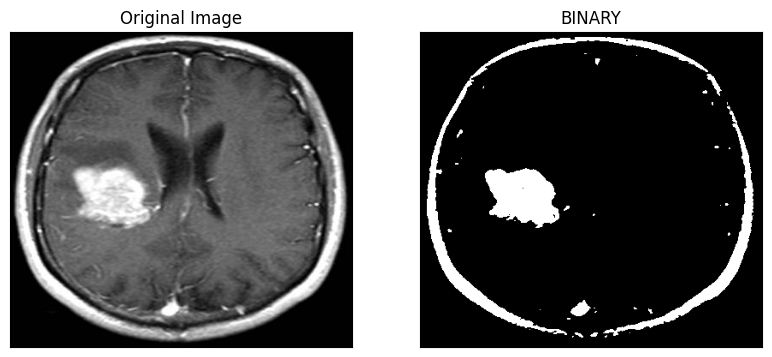

In [11]:
filename_1 = ("/content/drive/MyDrive/Images/Project/BrainTumor/Y11.jpg")
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1, 0)
# nilai Threshold yang ditentukan = 127

# thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img_g,180,255,cv2.THRESH_BINARY)
titles = ['Original Image','BINARY']
images = [img_g, thresh1]

plt.figure(figsize = (15,20))
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Masukkan nilai Gamma: 2


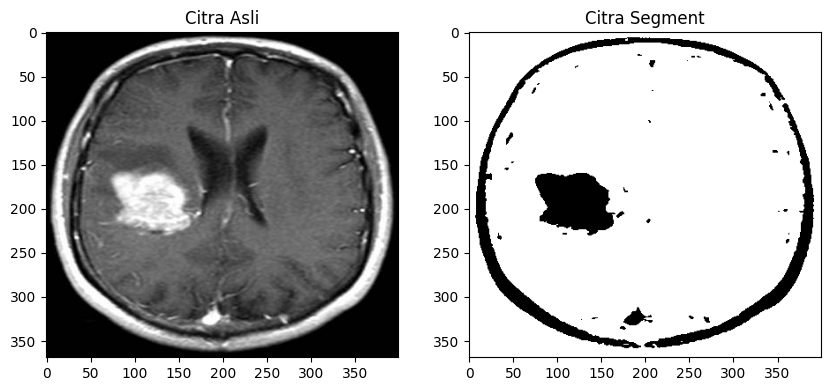

In [12]:
gbr_3 = ('/content/drive/MyDrive/Images/Project/BrainTumor/Y11.jpg')
img_l = cv2.imread(gbr_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_image = np.zeros(img_rgb.shape, img_rgb.dtype)

for y in range(img_rgb.shape[0]):
  for x in range(img_rgb.shape[1]):
    for c in range(img_rgb.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(img_rgb[y,x,c]/255,(1/gamma)), 0, 255)

ret3,mask = cv2.threshold(gamma_image,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
color = ('r','g','b')

plt.show()

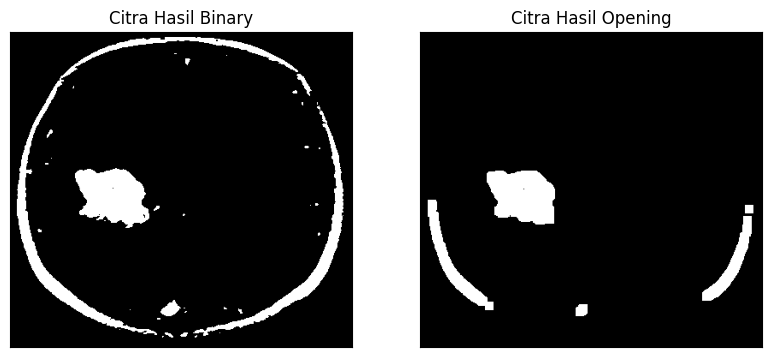

In [13]:
# Proses morphology pada citra yang sudah di treshold (opening)
# Proses ini digunakan untuk theshold binary
kernel = np.ones((10,10), np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)

titles = ['Citra Hasil Binary','Citra Hasil Opening']
images = [thresh1, opening]

plt.figure(figsize = (15,20))
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

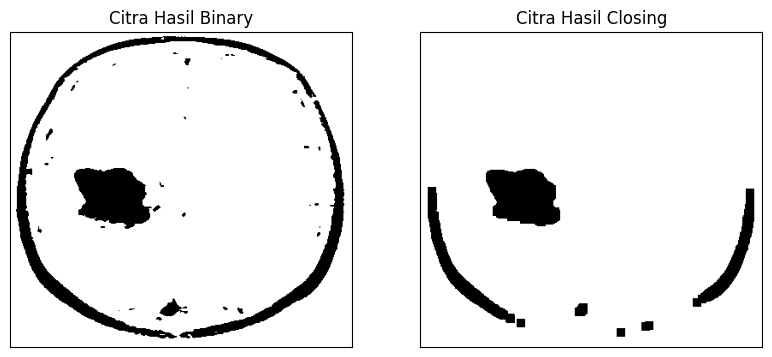

In [14]:
# Proses morphology pada citra yang sudah di treshold (closing)
# Proses ini digunakan untuk theshold binary inverse
kernel = np.ones((10,10), np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

titles = ['Citra Hasil Binary','Citra Hasil Closing']
images = [mask, closing]

plt.figure(figsize = (15,20))
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7f44dd83aa10>)

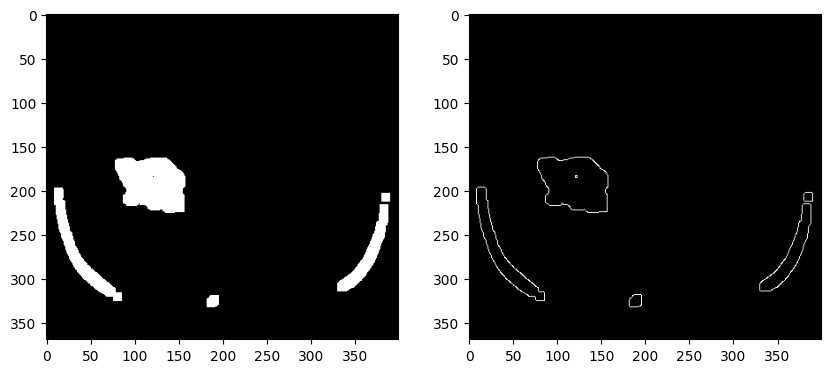

In [15]:
# (Canny Edge Detection)
edged = cv2.Canny(opening, 100, 200)

# Plot outputs
f, axarr = plt.subplots(1,2,figsize=(10,20))
plt.subplot(121), plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
axarr[0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(edged, cmap = 'gray')

In [16]:
bright_count = np.sum(np.array(opening) >= 200)

print(bright_count,"pixels are bright.")

7727 pixels are bright.


In [17]:
print("Kategori Ukuran Tumor : ")
if (bright_count > 5000 ):
  print("Besar")
elif (bright_count > 3300 and bright_count < 5000):
  print("Sedang")
elif (bright_count < 3300):
  print("Kecil")

Kategori Ukuran Tumor : 
Besar
